In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
from sklearn import metrics
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf= pd.read_table(url,sep=',',names=col_names)

In [4]:
#check the head of the data
spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [5]:
spectf.shape

(187, 45)

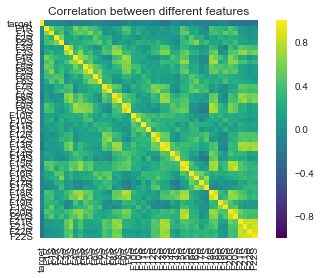

In [6]:
#check the correlation between the variables
correlation = spectf.corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [7]:
# store target variable in target variable and drop it from the spectf dataframe
target=spectf['target']
spectf.drop('target',axis=1,inplace=True)

In [8]:
spectf.head()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,67,68,73,78,65,63,67,60,63,62,...,61,56,76,75,74,77,76,74,59,68
1,75,74,71,71,62,58,70,64,71,68,...,66,62,68,69,69,66,64,58,57,52
2,83,64,66,67,67,74,74,72,64,68,...,67,64,69,63,68,54,65,64,43,42
3,72,66,65,65,64,61,71,78,73,69,...,69,68,68,63,71,72,65,63,58,60
4,62,60,69,61,63,63,70,68,70,65,...,66,66,58,56,72,73,71,64,49,42


In [9]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(spectf, target, random_state=123)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(X_train)

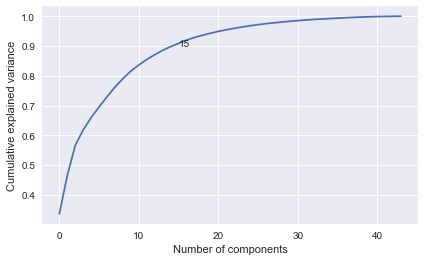

In [12]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(15, .90))

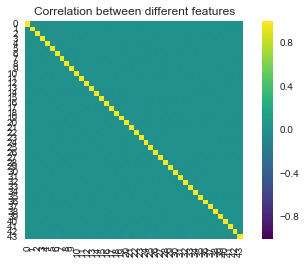

In [13]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(PCA().fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [14]:
#consider first 15 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=15)
spectf_pca = x_pca.fit_transform(X_std)

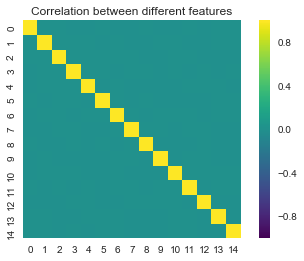

In [15]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(PCA(n_components=15).fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [16]:
rfClassifier=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 1)
start=time.time()
rfClassifier.fit(spectf_pca,y_train)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the model with 15 components is {}.".format(training_time_after_pca))

Time taken to train the model with 15 components is 0.22000002861.


In [17]:
rfClassifier.score(spectf_pca,y_train)

0.97857142857142854

In [18]:
pd.crosstab(target,1)

col_0,1
target,
0,15
1,172


In [19]:
# Now test the model

# First transform theinput for the test
#consider first 15 components as they are explaining the 90% of variation in the data
spectf_pca_test = x_pca.fit_transform(X_test)
test_pred = rfClassifier.predict(spectf_pca_test)
#df_confusion = metrics.confusion_matrix(y_test, test_pred)
df_confusion = metrics.precision_recall_fscore_support(y_test, test_pred,average='weighted')
df_confusion

(0.83533765032377427, 0.8936170212765957, 0.86349509921109258, None)

In [20]:
a=test_pred

In [21]:
b=y_test

In [24]:
result=pd.DataFrame(a,b)

In [25]:
result

,0
target,
1,1
1,1
1,1
1,1
1,1
1,1
0,1
1,1
1,1
